              precision    recall  f1-score   support

           0       0.80      0.99      0.88      3512
           1       0.32      0.01      0.02       909

    accuracy                           0.79      4421
   macro avg       0.56      0.50      0.45      4421
weighted avg       0.70      0.79      0.71      4421

Accuracy: 0.7921284777199729
Cross-Validation Accuracy: 0.7984618486919789


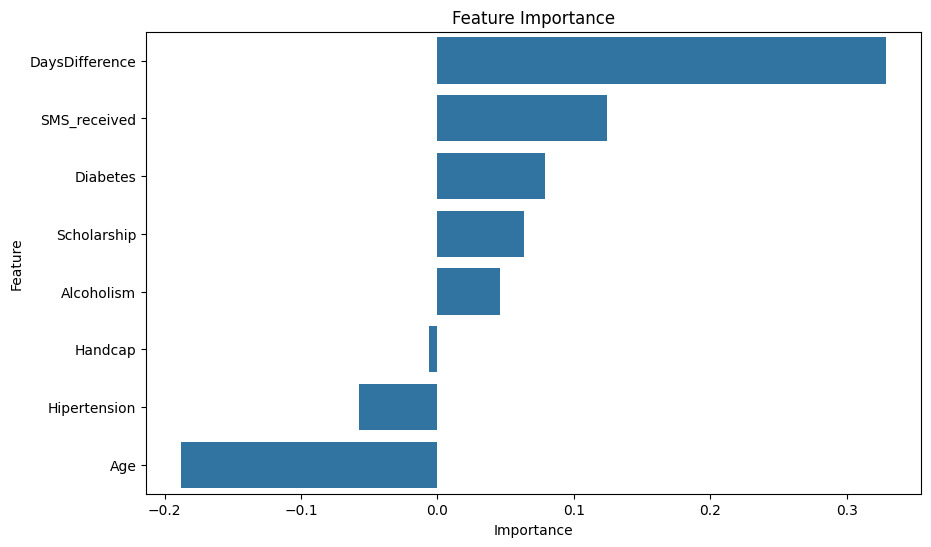

In [2]:
# Modeling

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('../data/appointments_cleaned.csv')

# Feature engineering
df['DaysDifference'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days
df['No_show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting a subset of the data for faster computation
df_sample = df.sample(frac=0.2, random_state=42)

# Feature selection
features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'DaysDifference']
X = df_sample[features]
y = df_sample['No_show']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

# Feature importance
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
